# Tutorial - Plotting LUT
This tutorial shows how to plot Prime Implicants (F') and Two-Symbol (F'') schematas

In [77]:
%matplotlib inline
import os
import graphviz
import math
import numpy as np
import matplotlib as mpl
import matplotlib.style
mpl.style.use('classic')
import matplotlib.pyplot as plt
from matplotlib.text import Text
from matplotlib.patches import Circle, Rectangle, RegularPolygon
from matplotlib.collections import PatchCollection
from copy import copy
from cana import BooleanNetwork
from IPython.display import display, Image, Latex, SVG, HTML
import subprocess

In [2]:
logic = {
    0:{'name':'A', 'in':[0],   'out':[0,1]},
    1:{'name':'B', 'in':[0,1], 'out':[0,1,1,1]},
    2:{'name':'C', 'in':[0,1], 'out':[0,0,0,1]}
}
N = BooleanNetwork.from_dict(logic, name="AND")

In [3]:
#N = THALIANA()
#N = DROSOPHILA()
#N = BUDDING_YEAST()
print N
n = N.nodes[0]
print n
print n.look_up_table()

<BNetwork(Name='AND', N=3, Nodes=['A', 'B', 'C'])>
<BNode(name='A', k=1, inputs=[A], state=0, outputs='[0,1]' constant=False)>
  In:  Out:
0   0     0
1   1     1


In [22]:
def plot_look_up_table(nid, n):
    # Init values from BooleanNode
    k = n.k if n.k>=1 else 1
    inputs = n.inputs if not n.constant else [n.name]
    LUT = n.look_up_table().sort_index(ascending=False)
    # Count number of F in the LUT
    n_fs = LUT.shape[0]
    # Schemata Cell Width and spacing
    cwidth = 60.
    cxspace = 0
    cyspace = 6
    border = 1
    sepcxspace = 21
    sepcyspace = 15
    dpi = 150.
    # Margins
    top, right, bottom, left, hs = 120, 25, 25, 60, 25
    # Axes Width & Height
    ax1width = ((k*(cwidth+cxspace))+sepcxspace+(cwidth))
    ax1height = (n_fs*(cwidth+cyspace)-cyspace)
    # Figure Width & Height
    fwidth = (left + ax1width + hs + right)
    fheight = (bottom + ax1height + top)
    # Percentages for Axes location
    _ax1w = ((ax1width*100) / fwidth) / 100
    _ax1h = ((ax1height*100) / fheight) / 100
    _bottom = ((bottom*100) / fheight) / 100
    _left = ((left*100) / fwidth) / 100
    _hs = ((hs*100) / fwidth) / 100
    # Init Figure
    fig = plt.figure(figsize=(fwidth/dpi,fheight/dpi), dpi=dpi)
    ax1 = fig.add_axes((_left,_bottom,_ax1w,_ax1h), aspect=1, label='LUT')

    ### LUT Plot ###

    yticks = []
    patches = []
    x,y = 0.,0.
    #
    for i,r in LUT.iterrows():
        ins = str(r['In:'])
        out = r['Out:']
        x = 0.
        xticks = []
        for input in ins:
            if input == '0':
                facecolor = 'white'
                textcolor = 'black'
            elif input == '1':
                facecolor = 'black'
                textcolor = 'white'      
            text = '%s'%(input)
            ax1.add_artist(Text(x+cwidth/2,y+cwidth/10*4, text=text, color=textcolor, va='center', ha='center',fontsize=14,family='serif'))
            r = Rectangle((x,y), width=cwidth, height=cwidth, facecolor=facecolor, edgecolor='black')
            patches.append(r)
            xticks.append(x+cwidth/2)
            x += cwidth + cxspace

        x += sepcxspace
        r = Rectangle((x,y), width=cwidth, height=cwidth, facecolor='black' if (out==1) else 'white', edgecolor='black')
        ax1.add_artist(Text(x-(sepcxspace/2)-(cxspace/2),y+cwidth/10*4, text=':', color='black', va='center', ha='center',fontsize=14,weight='bold',family='serif'))
        ax1.add_artist(Text(x+(cwidth/2),y+cwidth/10*4, text=out, color='white' if (out==1) else 'black', va='center', ha='center',fontsize=14,family='serif'))
        patches.append(r)
        xticks.append(x+cwidth/2)
        yticks.append(y+cwidth/2)
        y += cwidth + cyspace

        #y += sepcyspace

    ax1.add_collection(PatchCollection(patches,match_original=True))
    #
    ax1.set_yticks(yticks)
    ax1.set_yticklabels([r"$f_{%d}$"%(i+1) for i in range(n_fs)[::-1]], fontsize=14)
    ax1.set_xticks(xticks)
    ax1.set_xticklabels(inputs + ['%s'%(n.name)], rotation=90, fontsize=14)
    #
    ax1.xaxis.tick_top()
    # Remove Tick
    ax1.tick_params(which='major',pad=7)
    for tic in ax1.xaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    for tic in ax1.yaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    # Remove Border
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    # Limits
    ax1.set_xlim(-border,ax1width+border)
    ax1.set_ylim(-border,ax1height+border)
    #ax1.invert_yaxis() 

    # FileName
    filename = n.name
    filename = filename.replace('/','_')
    filename = filename.replace(',','_')
    ### SAVE to FILE ###
    plt.savefig('%s/../experiments/2018 - Test/%s' % (os.getcwd(), nid), dpi=dpi)
    #plt.show()
    plt.close()

In [23]:
for nid,n in enumerate(N.nodes):
    print 'Plotting: %s - %s' % (nid,n.name)
    print n.look_up_table()
    # Plot
    plot_look_up_table(nid,n)

Plotting: 0 - A
  In:  Out:
0   0     0
1   1     1
Plotting: 1 - B
  In:  Out:
0  00     0
1  01     1
2  10     1
3  11     1
Plotting: 2 - C
  In:  Out:
0  00     0
1  01     0
2  10     0
3  11     1


In [139]:
# Node Position for each one of the models
att = {}

# Calculates Node position in a circle. Used to plot nodes always in the same position.
for deg,name in zip(np.arange(90,360,3), ['A', 'B', 'C']):
    r = 10
    x, y = r*math.cos(math.radians(deg)), r*math.sin(math.radians(deg))
    att[name] = {'x':x,'y':y}

att['A'] = {'x':1,'y':1}
att['B'] = {'x':0,'y':0}
att['C'] = {'x':2,'y':0}

0 {'label': 'A'} 0
1,1!
1 {'label': 'B'} 0
0,0!
2 {'label': 'C'} 0
2,0!


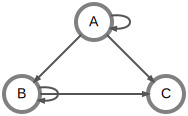

0

In [143]:
# Draw a Specific Attractor Configuration
Nsg = N.structural_graph()
S = graphviz.Digraph(name='Structural Graph', engine='neato')
S.attr('graph', concentrate='false', simplify='false', overlap='false',splines='true')
S.attr('node', shape='circle', fixedsize='true', width='.5', style='filled', penwidth='4', fontname='Helvetica', fontsize='14')
S.attr('edge', arrowhead='normal', arrowsize='.5', color='#545454')

for state,(node,d) in zip(['0','0','0'], Nsg.nodes(data=True)):
    print node,d,state
    if d['label'] in att:
        natt = att[d['label']]
        if 'x' in natt or 'y' in natt:
            x,y = natt['x'] , natt['y']
            xy = '%s,%s!' % (x,y)
    else:
        xy = 'false'
    color = 'gray'
    if state=='1':
        fontcolor ='white'
        fillcolor = 'black'
    else:
        fontcolor ='black'
        fillcolor = 'white'
    print xy
    S.node(name=str(node), label=d['label'], pos=xy, color=color, fillcolor=fillcolor, fontcolor=fontcolor)

max_penwidth = 2.
for s,t,d in Nsg.edges(data=True):
    weight = '%d' % (d['weight']*100)
    penwidth_scaled = '%.2f' % ( (d['weight']/1)*max_penwidth )
    S.edge(str(s),str(t), weight=weight, penwidth=penwidth_scaled, )
# Display
display(SVG(S.pipe(format='svg')),metadata={'isolated':True})
# Export
S._format = 'svg'
efile = u"%s/../experiments/2018 - Test/network" % (os.getcwd())
S.render(efile, cleanup=True)
subprocess.call("inkscape -z '%s.svg' -d 300 -e '%s.png'" % (efile,efile) , shell=True)